In [47]:
#!/usr/bin/env python

# JRK: from https://breakingcode.wordpress.com/2013/04/08/finding-connected-components-in-a-graph/

# Finding connected components in a bidirectional graph.
# By Mario Vilas (mvilas at gmail dot com)

import random
import string
import time
import numpy as np
import pickle
import sys

sys.setrecursionlimit(100000000)

# The graph nodes.
class Data(object):
    def __init__(self, name):
        self.__name  = name
        self.__links = set()

    @property
    def name(self):
        return self.__name

    @property
    def links(self):
        return set(self.__links)

    def add_link(self, other):
        self.__links.add(other)
        other.__links.add(self)

# The function to look for connected components.
def connected_components(nodes):

    # List of connected components found. The order is random.
    result = []

    # Make a copy of the set, so we can modify it.
    nodes = set(nodes)

    # Iterate while we still have nodes to process.
    while nodes:

        # Get a random node and remove it from the global set.
        n = nodes.pop()

        # This set will contain the next group of nodes connected to each other.
        group = {n}

        # Build a queue with this node in it.
        queue = [n]

        # Iterate the queue.
        # When it's empty, we finished visiting a group of connected nodes.
        while queue:

            # Consume the next item from the queue.
            n = queue.pop(0)

            # Fetch the neighbors.
            neighbors = n.links

            # Remove the neighbors we already visited.
            neighbors.difference_update(group)

            # Remove the remaining nodes from the global set.
            nodes.difference_update(neighbors)

            # Add them to the group of connected nodes.
            group.update(neighbors)

            # Add them to the queue, so we visit them in the next iterations.
            queue.extend(neighbors)

        # Add the group to the list of groups.
        result.append(group)

    # Return the list of groups.
    return result

# The test code...
if __name__ == "__main__":
    
    n_nodes = 2048
    times_generate = {}
    times_solve = {}
    
    while True:
        try:
            graph = []
            n_nodes = n_nodes + n_nodes
            nodes = []
            name_length = 8
            probability = 1.0 / (n_nodes * 2)
            print(probability)
    
            for i in range(n_nodes):
                hash = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(name_length))
                graph.append(Data(hash))
                
            start_time = time.time()
            for i in range(n_nodes):
                for j in range(n_nodes):
                    if random.uniform(0.0, 1.0) < probability:
                        graph[i].add_link(graph[j])
            stopped_time = time.time() - start_time
            
            print("Time to generate graph - nodes: " + str(n_nodes) + ":%s seconds" % stopped_time)
            times_generate[n_nodes] = stopped_time
            
            with open('connected_graph_' + str(n_nodes) + '.pkl', 'wb') as output:
                pickle.dump(graph, output, pickle.HIGHEST_PROTOCOL)
            
            # with open('connected_graph_1024.pkl', 'rb') as input:
            #     graph = pickle.load(input)
        
            # Find all the connected components.
            number = 1
            start_time = time.time()
            for components in connected_components(graph):
                names = sorted(node.name for node in components)
                names = ", ".join(names)
                print("Group #%i: %s" % (number, names))
                number += 1
            stopped_time = time.time() - start_time
            
            print("Time to solve graph - nodes: " + str(n_nodes) + ":%s seconds" % stopped_time)
            times_solve[n_nodes] = stopped_time
                
        except KeyboardInterrupt:
            break

0.0001220703125
Time to generate graph - nodes: 4096:7.489695072174072 seconds
Group #1: 4Q2D0Q9A, 5T0I09PR, BF90GU5H, GC5Q6HCN, PH4T9KQ3, UZPA6GLS, VLQU1QMG
Group #2: 049FG3UH, 0DJBRQ8A, 0M8XLQQ4, 0O4UF0QS, 10X114PB, 141W66ED, 1CKFHGJV, 1FNHQ8UD, 1MOJEAVU, 1Z2E5TEM, 2DG81C4A, 2EJHTTQ8, 2NT83AZ8, 37BSWK1D, 3D1GTABH, 3R1ELIBF, 3TNG0S6M, 4RYI2LZD, 5DI6OJ51, 5KX58AEV, 5N8PBBI8, 6KVBV5TW, 6OW9L9VJ, 6XBT4PS2, 6XL2YDM9, 6ZWJJNEU, 71OMISTH, 74DLGTEA, 760HEDU2, 7E9CJH1D, 7IQLNOZH, 7K026Y4W, 8A2BFJ4L, 8IR26EAF, 8ZYDVIOR, 91PGG4VD, 95UZ5XZC, 9DFVFRX8, 9JGZ8GU2, 9RHGR8AS, 9TS2Z216, A9IZHCK9, AGYGON35, AYYQ4XHN, BBA30OIS, BCUUNZNY, BLB9HEXK, CEAUR1GB, CI65XO10, CU5AII93, D8JVQHAU, DC0NPN0P, DL89IN5W, DO11DCP7, DZPVGJFZ, E36344ZY, E36NOIXT, E5O38NN7, EMCC412J, EUG9WCO8, EV3EZ4ZF, EVGT96TJ, EWL85J76, EZTB8FJG, F1QT689L, F7H6PRF3, FMPF2U4U, FR4FDUO4, GC8GV5IO, GFZYNGRT, GUIAX3TG, I7UJ5F6Y, IN6LVU8W, IQH6FZCB, IXJY5FT4, JUBPY9XI, KLV3HGKK, L2MDJMH1, L98I1ES0, LCQTOU5C, LU5CJ0KP, M1MXJ1KJ, M6BCAUG6, ME

In [34]:
print(times_generate)
print(times_solve)

{32: 0.0004801750183105469, 512: 0.15627002716064453, 2: 1.2159347534179688e-05, 4096: 7.076444149017334, 4: 1.3113021850585938e-05, 2048: 1.7829139232635498, 8192: 30.04224991798401, 8: 4.00543212890625e-05, 64: 0.001611948013305664, 128: 0.007079124450683594, 256: 0.026295900344848633, 16384: 114.74739003181458, 16: 0.0001239776611328125, 32768: 464.73139786720276, 1024: 0.48520898818969727}
{32: 0.00012087821960449219, 512: 0.003203153610229492, 2: 3.314018249511719e-05, 4096: 0.14337801933288574, 4: 2.8133392333984375e-05, 2048: 0.034132957458496094, 8192: 0.4857180118560791, 8: 4.9114227294921875e-05, 64: 0.00022411346435546875, 128: 0.0005578994750976562, 256: 0.0011610984802246094, 16384: 1.9489660263061523, 16: 6.794929504394531e-05, 32768: 7.070389032363892, 1024: 0.011729001998901367}


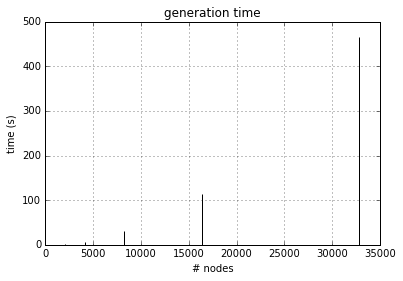

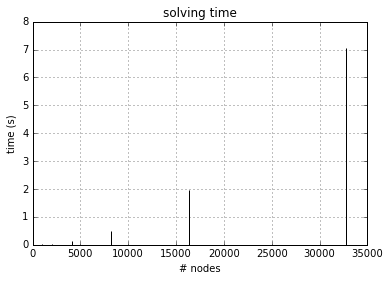

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.bar(list(times_generate.keys()), times_generate.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('generation time')
plt.grid(True)
plt.show()

plt.bar(list(times_solve.keys()), times_solve.values(), align='center')

plt.xlabel('# nodes')
plt.ylabel('time (s)')
plt.title('solving time')
plt.grid(True)
plt.show()